# Investigating A Movie DataSet

## Table Of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

> Questions To Explore
>>1. Which genres are most popular from year to year? <br>
>>2. Whether the popularity of the movie is dependent on the movie's budget?<br>

><br><br> Import the packaegs and read the "tmdb-movies.csv" into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

tmdb_df = pd.read_csv("tmdb-movies.csv")
# Checking the data types and total number of data points before starting the analysis. 
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>Describe the Data

In [2]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
## Data Wrangling

> Data wrangling phase :As it is evident from the above table, we don't have revenue and budget information for all the movies. We have revenue information only for 4850 movies and budget information for only 5170 movies out of 10866 movie details avaliable. I am planning to use Panda function dropna to handle this null values when I am plotting a visualization<br><br>
>As first part of the analysis we are going to separate the genre details along with years to analyze the data. The DataFrame provides information about the number of movies in each genre for every year.


In [3]:
# Obtaining a list of genres
genre_details = list(map(str,(tmdb_df['genres'])))
genre = []
for i in genre_details:
	split_genre = list(map(str, i.split('|')))
	for j in split_genre:
		if j not in genre:
			genre.append(j)
# printing list of seperated genres.
print genre

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'nan', 'Foreign']


>There are 20 different genres and there are movies with no genre information and they are noted as nan

> Next I obtain the range of years in the dataset

In [4]:
# minimum range value
min_year = tmdb_df['release_year'].min()
# maximum range value
max_year = tmdb_df['release_year'].max()
# print the range
print min_year, max_year

1960 2015


>Next a dataframe is created to create a table structure where the rows correspond to each genre and the columns correspond to the range of years.

In [5]:
# Creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)
print genre_df.head()

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              0     0     0     0     0     0     0     0     0     0   
Adventure           0     0     0     0     0     0     0     0     0     0   
Science Fiction     0     0     0     0     0     0     0     0     0     0   
Thriller            0     0     0     0     0     0     0     0     0     0   
Fantasy             0     0     0     0     0     0     0     0     0     0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...      0     0     0     0     0     0     0     0     0   
Adventure        ...      0     0     0     0     0     0     0     0     0   
Science Fiction  ...      0     0     0     0     0     0     0     0     0   
Thriller         ...      0     0     0     0     0     0     0     0     0   
Fantasy          ...      0     0     0     0     0     0     0     0     0   

                 2015  
Action              0  
Ad

>Here I create a array of years to access the various movies in each year and split the genres and increment the value of genre in the correspoding position in the dataframe.

In [6]:
# list of years of each movie
year = np.array(tmdb_df['release_year'])
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
			genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] + 1
    z+=1
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,108,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,41,52,71,46,56,54,61,62,86
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,125,127,157,135,146,160,175,179,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33
Crime,2,2,3,4,10,2,5,7,5,3,...,53,65,62,52,51,48,54,71,65,51
Western,6,3,3,2,1,4,7,2,1,7,...,1,5,2,0,6,3,4,3,6,6
Drama,13,16,21,13,20,20,16,16,20,13,...,197,197,233,224,211,214,232,253,284,260
Family,3,5,2,3,4,3,7,3,5,4,...,65,45,56,60,55,72,42,48,43,44
Animation,0,1,0,1,2,1,3,2,3,3,...,39,32,33,48,50,46,40,42,36,39


> The sum of all the values in the DataFrame is greater than 10866 since multiple genres can be assigned to the same movie.

>Next a pie chart is created which depicts the count of movies released in each genre over the years according to the given dataset.
>The top 10 genres are displayed and the remaining genres are displayed under the label others.

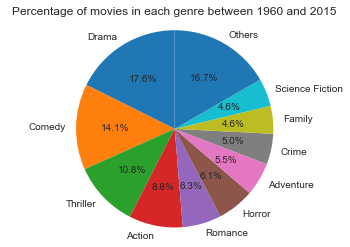

In [7]:
# number of movies in each genre so far.
genre_count = {}
genre = []
for i in genre_details:
	split_genre = list(map(str,i.split('|')))
	for j in split_genre:
		if j in genre:
			genre_count[j] = genre_count[j] + 1
		else:
			genre.append(j)
			genre_count[j] = 1
gen_series = pd.Series(genre_count)
# pi chart
gen_series = gen_series.sort_values(ascending = False)
label = map(str,gen_series[0:10].keys())
label.append('Others')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]:
    sum += i
gen['sum'] = sum
fig1, ax1 = plt.subplots()
ax1.pie(gen,labels = label, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Percentage of movies in each genre between 1960 and 2015")
plt.show()


>The above chart the number of movies in each genre over the years. We can interpret that most of movies released were in Drama followed by Comedy and so on. Therefore the number of movies in the genre drama is higher than the others compared. The plot depicts the top ten genres and others depicts the count of movies in the remaining genres.

>Next a seperate table is created  as a dataframe in a similar manner as above to hold the popularity value of the movies according to their genres for every year.

In [8]:
# Creating a dataframe with genre as index and years as columns to get a count of popularity
popularity_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
popularity_df = popularity_df.fillna(value = 0.0)
print popularity_df.head()

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure        ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller         ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy          ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 2015  
Action            0.0  
Ad

>An array is created which holds all the popularity details and it is checked for null values to see whether there is any unavalability of popularity in any of the datarows in the given dataset.

In [9]:
# list of popularity levels of each movie
popularity = np.array(tmdb_df['popularity'])
# to check whether any popularity is zero.
print len(popularity[popularity==0])
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
            popularity_df.loc[j, year[z]] = popularity_df.loc[j, year[z]] + popularity[z]
    z+=1
print popularity_df

0
                     1960      1961      1962      1963      1964      1965  \
Action           4.725796  2.561389  5.671563  3.806916  4.065433  4.062358   
Adventure        3.504904  4.603938  6.597594  5.099410  3.682157  3.490923   
Science Fiction  0.983714  1.096410  0.358424  0.935671  0.906544  0.203911   
Thriller         4.871460  0.000000  5.324075  7.199292  5.603219  3.773787   
Fantasy          0.856495  0.308146  0.235542  0.428142  2.399162  0.000000   
Crime            0.692959  1.613038  1.418448  2.209470  2.616900  0.774553   
Western          3.406554  0.630062  1.242541  0.493914  0.127679  0.767331   
Drama            7.361967  6.915731  8.232008  4.191829  7.296370  6.105756   
Family           0.834191  3.778608  0.646926  2.557897  3.513194  1.988139   
Animation        0.000000  2.631987  0.000000  2.180410  0.891493  0.600975   
Comedy           3.168003  6.798382  1.365917  5.778254  7.859657  2.511049   
Mystery          0.000000  0.712793  1.036881  2.5

>In the above output the 0 indicates all the datarows are provided with popularity values and there is no discreapancy in the data.

>I use a function to standardize the data of values in the popularity dataframe so that the data does not contain any discrepancies and is depicted as the number of standard deviations it is away from the mean. Positive value indicates the movie is popular and the negative values indicates the movie is unpopular or less popular comparatively. The mean value acts as the line of seperation for identifying the popular movies.

In [10]:
# function to standardize the popularity of values in dataframe.
def standardize(p):
    p_std = (p - p.mean()) / p.std(ddof = 0)
    return p_std


In [11]:
popularity_std = standardize(popularity_df)
popularity_std

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.343888,0.348172,1.605126,0.763857,0.718732,1.470893,1.246839,1.011440,-0.071646,2.024968,...,0.878259,1.187646,1.478735,1.279138,1.566287,1.812734,1.674032,1.544474,1.890421,1.778593
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.027009,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.091894,0.212188,0.189865,0.575138,0.902119,1.231957
Thriller,1.414381,-0.893419,1.458291,2.430280,1.393755,1.295872,0.280651,0.418422,0.209143,0.464049,...,1.380434,1.818235,1.410043,1.505248,1.547200,1.678862,1.584692,1.679992,1.487353,1.765087
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.149189,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.158512,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974396,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302
Drama,2.619644,2.458868,2.687073,0.952936,2.136978,2.710231,2.376758,2.200644,2.492369,2.567760,...,2.450163,2.384021,2.497239,2.122898,2.172743,1.964838,2.361142,2.486464,2.279043,1.812305
Family,-0.539425,0.938199,-0.518093,0.150307,0.476322,0.212862,0.669034,0.180522,-0.101370,-0.098897,...,0.563438,0.132849,0.197567,0.146311,0.314477,0.250985,-0.279790,-0.187286,-0.347616,-0.288343
Animation,-0.943125,0.382394,-0.791460,-0.035124,-0.674495,-0.628465,0.000464,0.108664,-0.688078,-0.509190,...,-0.052683,-0.392159,-0.259355,-0.098265,-0.172943,-0.022173,-0.256646,-0.254532,-0.444186,-0.466042


>Next I create a series to hold the most popular genre for every year so i create a series with the range of years as the index.

In [12]:
# Creating a series to hold the popular genre for every year.
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre.head()

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

> Finally from the dataframe which contains the table of standardized popularity values i identify the maximum value for each column and it is identified as the most popular genre for that particular year and it is added to the Series.

In [13]:
# to identify the genre with maximum standardized popularity value
for i in range(min_year, max_year + 1):
    pop_genre[i] = popularity_std[i].argmax()
pop_genre

1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015      

>From the identify we can plainly see that the Drama is the most popular genre for most of the years. And in the graph below the changes in the popularity levels for the "Drama" genre is depicted over the years.

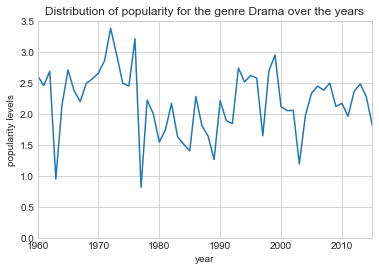

In [14]:
# to plot a histogram of genre 'Drama'.
plt.plot(popularity_std.loc['Drama'])
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Drama over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()


>From the above graph we can see the rise and fall of the genre Drama over the years. There are steep rises and falls in the popularity levels of the genre. The mean of the distribution above lies between 1980 t0 1990 since there steep rises and falls on both the ends so the mean almost has to be in the middle. From the graph we can also infer that the standarnd deviation is almost 0.5.

><b>The next question is posed is whether popularity of a movie is dependent upon the budget allocated for that movie</b>

>Next I standardize the popularity data available in the array and load it in a new Series with the id of the dataset as the datas index.

In [15]:
# Standardizing popularity data
std_pop = pd.Series(((popularity - popularity.mean()) / popularity.std(ddof = 0)), index = tmdb_df['id'])
std_pop.head()

id
135397    32.334830
76341     27.769638
262500    12.464335
140607    10.525201
168259     8.687366
dtype: float64

>Next i load the information about the budget data into the new series.

In [16]:
# Obtaining budget data for positive values in standardized popularity.
budget = pd.Series(np.array(tmdb_df['budget']), index = tmdb_df['id'])
budget.head()

id
135397    150000000
76341     150000000
262500    110000000
140607    200000000
168259    190000000
dtype: int64

> In the above budget array there are budget values which are zero. A movie cannot have been created with zero budget. Hence removing the data which is incomplete. I remove the data from the standardized popularity data and the budget data available by using a seprate boolean array which denotes if the budget is zero or not.

In [17]:
# to remove incomplete data from the dataset.
boolean = budget <> 0
std_pop = std_pop[boolean]
budget = budget[boolean] 

In [18]:
print budget.head()
print std_pop.head()

id
135397    150000000
76341     150000000
262500    110000000
140607    200000000
168259    190000000
dtype: int64
id
135397    32.334830
76341     27.769638
262500    12.464335
140607    10.525201
168259     8.687366
dtype: float64


In [19]:
print len(std_pop)
print len(budget)

5170
5170


> Only 5170 datarows out of the 10866 datarows in the dataset were complete with the budget details provided.

>Next the budget data loaded in the series is being standardized.

In [20]:
# Standardizing the budget values using the function standardize defined above
std_budget = standardize(budget)
std_budget.head()

id
135397    3.066070
76341     3.066070
262500    2.037710
140607    4.351519
168259    4.094429
dtype: float64

>Next the co relation coefficient is calculated to determine details about the relationship between a movie's budget and its corresponding popularity

In [21]:
# co relation coefficient(Pearson's value)
(std_pop * std_budget).mean()

0.63778367413061254

>The Pearson's coefficient value is a positive value which denotes that there is a strong relatinship between the movie popularity and budget proportionaly. Therefore budget is one of the factors deciding the popularity of the movie.

<a id='conclusions'></a>
# Conclusion
>Thus the most popular genre in most of the years is <b> Drama. </b>
>The table gives a list of the most popular genres from 1960 to 2015.
>The graphs shows the popularity distribution of the genre drama over the years in the given dataset and the distribution of genres in the movie set.<br>
>The movie's budget plays a crucial role in the popularity of the film which is proved from the Pearson's coefficient which is calculated form the cleaned budget and popularity dataset.
>But since there was lack of data regarding budget we cannot entirely rely on the data remaining after cleaning to determine whether the above stated relationship is true. From the cleaned dataset we have arrived at the relationship. Almost half the dataset was removed cause of unavailability of budget details. Therefore the above stated relationship is paritally true.
>